In [1]:
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [2]:
#df = pd.read_csv('D:/BRAC/Thesis/data/Heart_Disease_PredictionVJ.csv')
df = pd.read_csv('D:/BRAC/Thesis/data/recent/heart_rajniKant_11days.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
target_col = "ca"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

In [5]:
clf_lgb = lgb.LGBMClassifier(n_iterations=100, max_depth=6, silent=False, learning_rate=0.1)  #100, 0.1
clf_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)] )

[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 13
[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -0.567298
[LightGBM] [Info] Start training from score 

[50]	valid_0's multi_logloss: 0.29285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's multi_logloss: 0.290935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's multi_logloss: 0.288976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[85]	valid_0's multi_logloss: 0.267684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	valid_0's multi_logloss: 0.26843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	valid_0's multi_logloss: 0.267663
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(max_depth=6, n_iterations=100, silent=False)

In [6]:
y_pred = clf_lgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9498525073746312

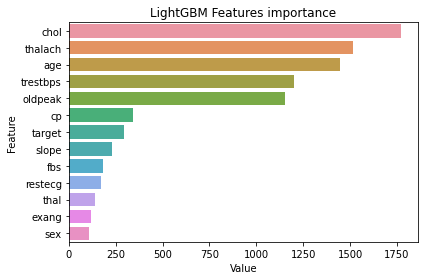

In [7]:
feature_imp = pd.DataFrame(sorted(zip(clf_lgb.feature_importances_,X.columns)), columns=['Value','Feature'])

sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features importance')
plt.tight_layout()
plt.show()


Confusion matrix:
 [[189   0   0   0   0]
 [ 10  75   0   0   0]
 [  7   0  35   0   0]
 [  0   0   0  19   0]
 [  0   0   0   0   4]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       189
           1       1.00      0.88      0.94        85
           2       1.00      0.83      0.91        42
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         4

    accuracy                           0.95       339
   macro avg       0.98      0.94      0.96       339
weighted avg       0.95      0.95      0.95       339



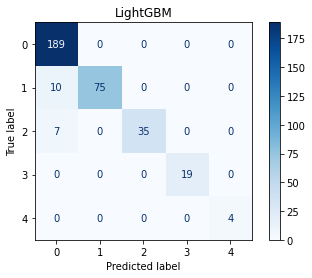

In [8]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',confusion_matrix)
print('\nClassification report:\n',metrics.classification_report(y_test, y_pred))
# plot confusion matrix
disp = metrics.plot_confusion_matrix(clf_lgb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('LightGBM')
plt.savefig('Confusion Matrix')

In [9]:
accuracy= accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate     #classification error

0.05014749262536877

In [10]:
#tune the hyperparameters
from sklearn.model_selection import GridSearchCV
LR= {'learning_rate': [0.5, 0.1, 0.05, 0.005],
     'n_estimators':[100,150,200,250,50]}

tuning = GridSearchCV(estimator = LGBMClassifier(),
                   param_grid = LR )
                   # scoring = 'F1')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_ 

({'learning_rate': 0.1, 'n_estimators': 100}, 0.9387390246482598)